In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import model, analysis, util, implicit_curve

In [20]:
import importlib
util = importlib.reload(util)
analysis = importlib.reload(analysis)
implicit_curve = importlib.reload(implicit_curve)
model = importlib.reload(model)
compute = True

## Time Evolution of the Projekted Asymmetry

In [9]:
f_a = 3e14
H_inf = 2e10
m_a = 1e8
Gamma_phi = 1e7

/home/jana/Documents/master-project/axion_spg/model.py:275: RuntimeWarning: overflow encountered in exp
  rho_R, rho_a, R = np.exp(y)
/home/jana/Documents/master-project/axion_spg/model.py:279: RuntimeWarning: invalid value encountered in double_scalars
  d_log_rho_R_d_log_t = - t * (4 * H - Gamma_a * rho_a / rho_R)


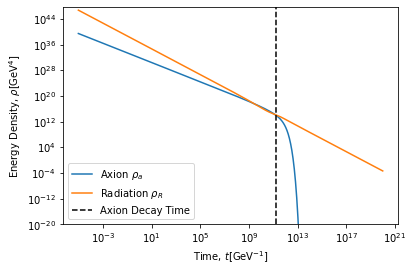

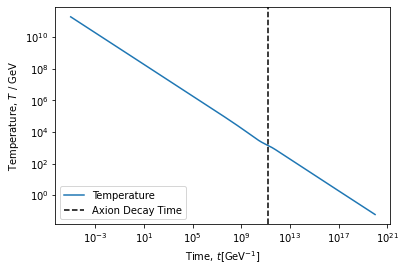

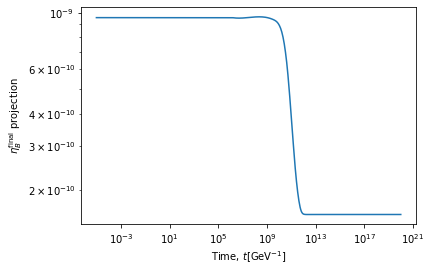

/home/jana/Documents/master-project/axion_spg/model.py:275: RuntimeWarning: overflow encountered in exp
  rho_R, rho_a, R = np.exp(y)
/home/jana/Documents/master-project/axion_spg/model.py:279: RuntimeWarning: invalid value encountered in double_scalars
  d_log_rho_R_d_log_t = - t * (4 * H - Gamma_a * rho_a / rho_R)


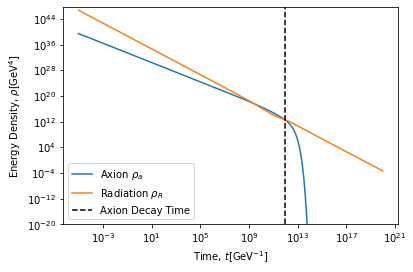

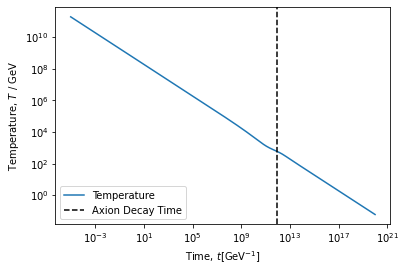

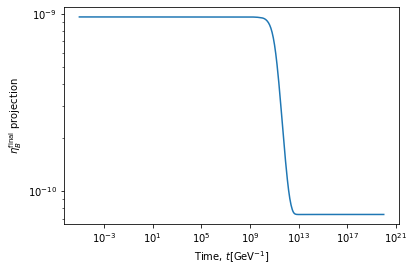

In [10]:
analysis.make_decay_plots(m_a, f_a, Gamma_phi, H_inf, decay_kwargs=dict(calc_Gamma_a_fn=model.calc_Gamma_a_SU2))
analysis.make_decay_plots(m_a, f_a, Gamma_phi, H_inf, decay_kwargs=dict(calc_Gamma_a_fn=model.calc_Gamma_a_U1));

## Contour Plot of the Asymmetry in the Parameter Space for fixed $f_a$

In [ ]:
name = "U1_decay_eta_B.pkl"
if compute:
    m_a_s, Gamma_phi_s, eta_B_numerical = analysis.sample_parameter_space_numerical(f_a, H_inf,
        kwargs=dict(decay_kwargs=dict(calc_Gamma_a_fn=model.calc_Gamma_a_U1)))
    util.save_data(name, m_a_s, Gamma_phi_s, eta_B_numerical)
else:
    m_a_s, Gamma_phi_s, eta_B_numerical = util.load_data(name)

In [15]:
_, _, _, eta_B_paper = util.load_data("paper_eta_B.pkl")

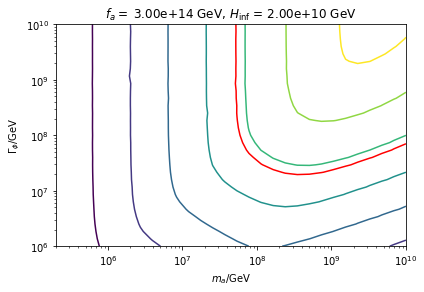

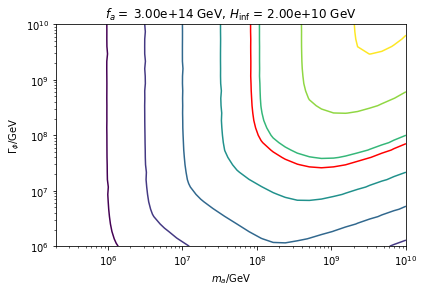

In [17]:
def make_level_plot(eta_B, save=False, filename="sbg_leptogenesis_axion_osc_contour_plot_U1_decay.pdf"):
    levels = np.sort(np.concatenate([np.arange(-13, -7 + 1), [np.log10(model.eta_B_observed)]]))

    # numerical result
    CS2 = plt.contour(m_a_s, Gamma_phi_s, np.log10(eta_B), levels=levels)
    CS2.collections[np.where(CS2.levels == np.log10(model.eta_B_observed))[0][0]].set_color("red")

    # labels
    plt.xscale("log"); plt.yscale("log")
    plt.xlabel(r"$m_a / \mathrm{GeV}$")
    plt.ylabel(r"$\Gamma_\phi / \mathrm{GeV}$")
    plt.tight_layout()
    plt.title(f"$f_a =$ {f_a:.2e} GeV, $H_\\mathrm{{inf}}$ = {H_inf:.2e} GeV")
    plt.savefig(util.make_plot_path(filename))
make_level_plot(eta_B_paper)
plt.show()
make_level_plot(eta_B_numerical)

## Correct Asymmetry as a Function of $f_a$

In [21]:
name = "U1_decay_curves.pkl"
if compute:
    f_a_list = [4e10, 1e13, 1e14, 1e15, 4e15]
    curves = [analysis.compute_correct_curve(f_a, model.calc_H_inf_max(f_a) / 10,
                                            decay_kwargs=dict(calc_Gamma_a_fn=model.calc_Gamma_a_U1)) 
              for f_a in tqdm(f_a_list)]
    util.save_data(name, f_a_list, curves)
else:
    f_a_list, curves = util.load_data(name)

/home/jana/Documents/master-project/axion_spg/model.py:275: RuntimeWarning: overflow encountered in exp
  rho_R, rho_a, R = np.exp(y)
/home/jana/Documents/master-project/axion_spg/model.py:279: RuntimeWarning: invalid value encountered in double_scalars
  d_log_rho_R_d_log_t = - t * (4 * H - Gamma_a * rho_a / rho_R)
/home/jana/Documents/master-project/axion_spg/model.py:275: RuntimeWarning: overflow encountered in exp
  rho_R, rho_a, R = np.exp(y)
/home/jana/Documents/master-project/axion_spg/model.py:279: RuntimeWarning: invalid value encountered in double_scalars
  d_log_rho_R_d_log_t = - t * (4 * H - Gamma_a * rho_a / rho_R)
/home/jana/Documents/master-project/axion_spg/model.py:279: RuntimeWarning: overflow encountered in double_scalars
  d_log_rho_R_d_log_t = - t * (4 * H - Gamma_a * rho_a / rho_R)
/home/jana/Documents/master-project/axion_spg/model.py:279: RuntimeWarning: divide by zero encountered in double_scalars
  d_log_rho_R_d_log_t = - t * (4 * H - Gamma_a * rho_a / rho_R)


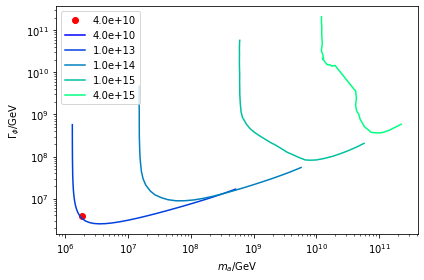

In [22]:
cmap = plt.get_cmap("winter")
for x, f_a, (curve_m_a, curve_Gamma_phi) in zip(np.linspace(0, 1, len(f_a_list)), f_a_list, curves):
    if len(curve_m_a) == 1:
        plt.plot(curve_m_a, curve_Gamma_phi, "or", label=f"{f_a:.1e}")
    plt.plot(curve_m_a, curve_Gamma_phi, color=cmap(x), label=f"{f_a:.1e}")
plt.xscale("log"); plt.yscale("log")
plt.xlabel(r"$m_a / \mathrm{GeV}$")
plt.ylabel(r"$\Gamma_\phi / \mathrm{GeV}$")
#scalar_map = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=min(f_a_list), vmax=max(f_a_list)))
#cbar = plt.colorbar(scalar_map)
#cbar.set_label(r"$f_a / \mathrm{GeV}$") # TODO: the colorbar is not correct!!!!
plt.legend()
plt.tight_layout()
plt.savefig(util.make_plot_path("correct_eta_B_curves_U1_decay.pdf"))